Saving mall customers.csv to mall customers.csv
✅ Dataset Loaded Successfully!
Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

📊 Segment Distribution:
Segment
Medium    83
Low       63
High      54
Name: count, dtype: int64

✅ Confusion Matrix:
[[13  0  0]
 [ 0 17  4]
 [ 1  0 25]]

✅ Classification Report:
              precision    recall  f1-score   support

        High       0.93      1.00      0.96        13
         Low       1.00      0.81      0.89        21
      Medium       0.86      0.96      0.91        26

    accuracy                           0.92        60
   macro a

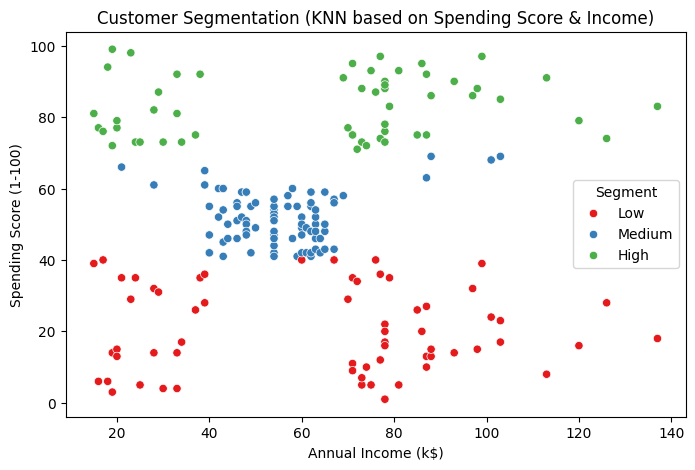

In [1]:
# ===========================================
# Assignment-1: KNN on Mall Customers Dataset
# ===========================================

# Step 1: Upload dataset (choose 'mall customers.csv' from your computer)
from google.colab import files
uploaded = files.upload()

# Step 2: Load dataset
import pandas as pd

# If file has a space in name, handle with quotes
data = pd.read_csv("mall customers.csv")

print("✅ Dataset Loaded Successfully!")
print("Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())

# Step 3: Preprocessing
from sklearn.preprocessing import LabelEncoder

# Encode Gender (Male=1, Female=0)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Features
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Target: Segment based on Spending Score
data['Segment'] = pd.cut(data['Spending Score (1-100)'],
                         bins=[0,40,70,100],
                         labels=['Low','Medium','High'])
y = data['Segment']

print("\n📊 Segment Distribution:")
print(y.value_counts())

# Step 4: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 7: Predictions
y_pred = knn.predict(X_test)

# Step 8: Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\n✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# Step 9: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Annual Income (k$)'],
                y=data['Spending Score (1-100)'],
                hue=data['Segment'], palette="Set1")
plt.title("Customer Segmentation (KNN based on Spending Score & Income)")
plt.show()
